# Neural Networks

## Keras
Keras Introduction: https://keras.io/

Keras Cheatsheet: https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Keras_Cheat_Sheet_Python.pdf

Keras FAQ: https://keras.io/getting-started/faq/

Keras Sequential API: https://keras.io/getting-started/sequential-model-guide/

## What about Tensorflow?

Tensorflow is available as a "backend" for Keras. By default, Keras will use Tensorflow to perform deep learning operations.

More about backends here: https://keras.io/backend/

## Major Differences between Keras and Scikit-Learn

|Sklearn|Keras|
|--|--|
|Use for Machine Learning and limited Deep Learning (MLPClassifier, MLPRegressor)|Use only for Deep Learning|
|Scope: Linear Regression, Logistic Regression, Support Vector Machines, KMeans, PCA, etc|Scope: Deep Learning layers such as Dense, Convolutional, Recurrent|
|Only SGDRegressor, SGDClassifier,  MLP* do gradient descent|Exclusively uses gradient descent and back propagation|
|Not designed for long-haul training|Designed for long-haul training, supports saving and resuming training|
|Limited support for incremental fit|Always fits incrementally, unless you recompile network|
|Does not support GPU|Supports GPU|
|Does not support Tensorflow|Supports Tensorflow through a backend|
|Provides learning_curve() function for learning curve|Uses [Tensorboard](https://www.tensorflow.org/guide/summaries_and_tensorboard) for learning curve|
|Provides cross_validate() function for cross validation|Cross-validation is not supported, use validation split that is built into fit()|
|Supports fit with univariate y output only|Supports fit with univariate and multi-variate y output. For classification, y must be one-hot (more in the workshop)|

There are other minor differences between how the two libraries work. We'll highlight it along the way.

**Caution**: always consult documentation (don't assume Keras works like Scikit-learn, otherwise you waste time debugging)

## Keras Machine Learning Workflow

1. Problem Definition
    - Same as you normally would for any machine learning problem. The key difference with Keras is in the choice of neural networks as the model.

2. Data Engineering
    - Use pandas as you normally would

3. Feature Engineering
    - Use sklearn as you normally would

4. Model Engineering
    
    a. Define initial neural net
        - Define model architecture, such as the input shapes, output shapes, and neural network layers
        - model.compile to pick optimiser, loss function, metrics

    b. Setup training callbacks:
        - Learning curve using Tensorboard
        - Early stopping
        - [Optional] Model checkpoints to automatically save weights after every epoch
    
    c. Train model:
        - model.fit(): Unlike sklearn, fit() is cumulative (continues progress if you it call repeatedly)

        sklearn:
        ```
            model = SGDRegressor()
            model.fit(X_train, y_train)
            model.fit(X_train, y_train) # RESTARTS from scratch
        ```

         Keras:
         ```
             model.compile()
             model.fit(X_train, y_train) 
             model.fit(X_train, y_train) # RESUMES training from previously
         ```
         
5. Evaluation metrics
    - Keras: model.evaluate() - similar to model.score() in sklearn
    - Evaluation metrics in sklearn are more comprehensive. Use them here (e.g. classification_report)

6. Deployment
    - model.save()
    - load_model()
    - model.predict()

In this workshop, we'll walk through a simple Keras example to understand how to use it:

https://github.com/keras-team/keras/blob/master/examples/mnist_mlp.py

In [1]:
import keras
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

%matplotlib inline

Using TensorFlow backend.


## Load dataset

Keras includes some built-in datasets that are useful for learning and practice.

https://keras.io/datasets/

In [2]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

## Data processing

In [3]:
X_train.shape # 60000 rows, 28 x 28 pixels

(60000, 28, 28)

In [4]:
y_train[0]

5

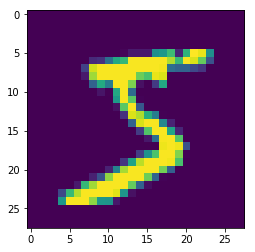

In [5]:
plt.imshow(X_train[0]) # display first image (first row)

In [6]:
# Keras requires the targets to be categorical (one-hot)
# vectors rather than class (label) vectors
# This means that we need to convert the target
# before passing it to fit() if doing multi-class classification

# convert class vectors to categorical vectors
# 5 to [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]
num_classes = 10 # 10 digits

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [7]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [8]:
keras.utils.to_categorical(2, 5)

array([0., 0., 1., 0., 0.], dtype=float32)

In [9]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

## Feature engineering

This is an example dataset, so not much feature engineering is needed.

## Model engineering

To run tensorboard for viewing the Learning Curve

- Launch another Anaconda Prompt (because tensorboard will run in its own console):

```
(base) conda activate mldds
(mldds) cd folder\to\this\notebook
(mldds)tensorboard --logdir=logs --host=0.0.0.0
```

If this is the first time you are launching Tensorboard, you will not see any sessions until you call model.fit():

```
tensorboard = TensorBoard(log_dir='./logs/mnist_mlp/%d' % time.time())
history = model.fit(X_train, y_train, batch_size=128, epochs=10,
                    callbacks=[tensorboard], validation_split=.25)
```


In [10]:
# Flatten from 28x28 to 784 (because we are using MLP)
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

# Scale from 0-255 into 0-1
# Scaling is generally recommended for neural networks
# for faster convergence
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [11]:
from keras.models import Sequential
from keras.layers import Dense
# from keras.layers import Dropout

model = Sequential()

# input: 784, output: 512 => 784 x 512 weights + 512 bias
# (512 neurons)
model.add(Dense(512, activation='relu', input_shape=(784,)))
# model.add(Dropout(0.2))

# input: 512, output: 512 => 512 x 512 weights + 512 bias
# (512 neurons)
model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.2))

# input: 512, output: 10 => 512 x 10 weights
# (10 neurons)
# softmax converts a set of outputs to probabilities that add up to 1
model.add(Dense(num_classes, activation='softmax'))

model.summary()
# Param # is W + bias
# Dense: input_shape x output_shape + output_shape
#  (where input_shape = previous layer's output_shape)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [12]:
from keras.callbacks import TensorBoard
from keras.optimizers import RMSprop
import time

batch_size = 128
num_classes = 10
epochs = 20

tensorboard = TensorBoard(log_dir='./logs/mnist_mlp/%d' % time.time())

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy']) # Tensorboard will display
                                    # acc in addition to loss

history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    callbacks=[tensorboard],
                    validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 44s 729us/step - loss: 0.2217 - acc: 0.9325 - val_loss: 0.1101 - val_acc: 0.9633
Epoch 2/20
60000/60000 [==============================] - 11s 178us/step - loss: 0.0810 - acc: 0.9750 - val_loss: 0.0901 - val_acc: 0.9742
Epoch 3/20
60000/60000 [==============================] - 10s 160us/step - loss: 0.0548 - acc: 0.9830 - val_loss: 0.0726 - val_acc: 0.9800
Epoch 4/20
60000/60000 [==============================] - 10s 161us/step - loss: 0.0391 - acc: 0.9878 - val_loss: 0.0870 - val_acc: 0.9762
Epoch 5/20
60000/60000 [==============================] - 10s 169us/step - loss: 0.0283 - acc: 0.9912 - val_loss: 0.0850 - val_acc: 0.9807
Epoch 6/20
60000/60000 [==============================] - 10s 172us/step - loss: 0.0234 - acc: 0.9929 - val_loss: 0.0869 - val_acc: 0.9806
Epoch 7/20
60000/60000 [==============================] - 10s 167us/step - loss: 0.0181 - acc: 0.9943 - val_loss: 0.

In [13]:
for layer in model.layers:
    print(layer.get_config())
    print(layer.get_weights())

{'name': 'dense_1', 'trainable': True, 'batch_input_shape': (None, 784), 'dtype': 'float32', 'units': 512, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}
[array([[-0.02687832, -0.05516374,  0.01237827, ..., -0.03513752,
         0.01474103,  0.04615369],
       [-0.01131217, -0.01923892,  0.02422648, ...,  0.00201312,
        -0.01998544, -0.03846251],
       [-0.03517682, -0.06047336, -0.00754339, ...,  0.01250513,
        -0.00824294, -0.00975702],
       ...,
       [ 0.03877281,  0.03775353, -0.01422515, ...,  0.06636353,
        -0.04554664,  0.04578243],
       [-0.01001232,  0.06227018, -0.03251781, ...,  0.04080224,
        -0.01955776,  0.01130953],
  

## Predictions

9


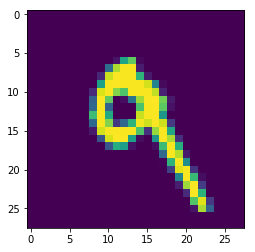

In [14]:
# for display, un-flatten to 28x28
plt.imshow(X_test[7].reshape(28, 28))

# argmax converts one-hot to the value (which is the maximum index)
# [0 .... 0 1] => 9 (9 is the 9th index in the one-hot array)
print(y_test[7].argmax())

# need the flattened (784) shape for predict because the model
# expects it


In [15]:
# before feeding into Keras, we need to reshape
# input into (batch_index, 784)

# Typical error when forgetting to reshape:
#
# ValueError: Error when checking input: expected dense_7_input 
# to have shape (784,) but got array with shape (1,)
#

In [16]:
# reshape to (1, anything)
pred = model.predict(X_test[7].reshape(1, -1)) # can also .reshape(1, 784)
pred.argmax()

9

In [17]:
model.predict_classes(X_test[7].reshape(1, -1))

array([9], dtype=int64)

## Metrics

In [18]:
y_pred = model.predict_classes(X_test) # return labels so that
                                       # sklearn metrics work
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [19]:
# Truth needs to be converted from one-hot to labels again
# so that sklearn metrics work
y_test.argmax(axis=1) # column-wise, axis=1 (10 columns)

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [20]:
print(classification_report(y_test.argmax(axis=1), y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.99      0.98      0.98      1010
           4       0.99      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.98      0.99      0.99       958
           7       0.99      0.98      0.98      1028
           8       0.98      0.97      0.97       974
           9       0.97      0.98      0.97      1009

   micro avg       0.98      0.98      0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

